## Notebook 2 - Free massive non-relativistic particle:
-------------
We start by considering one non-relativistic massive particle in one spatial dimension. We want to quantize (represent on a complex-valued linear vector space) the free-space non-relativistic energy-momentum relation

$$
E= \frac{p^2}{2m}.
$$

As the physical (real) space we consider $x \in \Omega_{\rm spatial} = [0,L]$ with $L>0$. 

## Q. 2.1:
-------------
The usual procedure of quantization is to replace $E \rightarrow i \hbar \partial_t$ and (for one dimension) $p \rightarrow - i \hbar \partial_x$. Focusing on the static problem, i.e.,

$$
E \psi(x) = -\frac{\hbar^2}{2m} \partial_x^2 \psi(x)
$$

what are we still missing in the prescription? 

<details>
<summary>Hint</summary>

Remember the basic property that any operator in quantum physics should obey.

</details>

## A. 2.1:
-------------
We need to guarantee self-adjointness of the differential operator $-\tfrac{\hbar^2}{2m} \partial_x^2$. A prerequisite for self-adjointness is that the operator is symmetric, i.e.,

$$
-\frac{\hbar^2}{2m} \langle \psi | \partial_x^2 \psi \rangle = -\frac{\hbar^2}{2m} \int_{0}^{L} \psi^{*}(x) \; \partial_x^2 \; \psi(x) d x \overset{!}{=} -\frac{\hbar^2}{2m} \int_{0}^{L} \left( \partial_x^2 \; \psi(x)\right)^{*}  \psi(x) d x = -\frac{\hbar^2}{2m} \langle \partial_x^2  \psi | \psi \rangle. 
$$

Thus we need to choose appropriate boundary conditions. There are indeed infinitely many choices, but as we will explain in this lecture, the periodic boundary conditions

$$
\psi(0)= \psi(L) \; {\rm and} \; \left. \partial_x \psi(x) \right|_{x=0} = \left. \partial_x \psi(x) \right|_{x=L}
$$

are the natural ones to take. <font color='red'>The relation of self-adjointness to symmetries will be discussed in some detail in Lec.1.2. For the reason why we do not also have similar conditions on time in quantum physics, please ask the lecturers.</font>

## Q. 2.2:
-------------
Please next solve for the orthonormalized eigenfunctions of 

$$
E_l \psi_l(x) = -\frac{\hbar^2}{2m} \partial_x^2 \psi_l(x),
$$

with periodic boundary conditions on $\Omega_{\rm spatial} = [0,L]$. 

## A. 2.2:
-------------
The solutions are the plane waves

$$
\psi_{l}(x) = \frac{1}{\sqrt{L}} \exp\left(i \tfrac{2 \pi}{L} l x \right),
$$

with $l \in \mathbb{Z}_0$ and the eigenenergies

$$
E_l = \frac{\hbar^2}{2m} k_{l}^2,
$$

where $k_{l} = \tfrac{2 \pi}{L} l$ are the quantized wave numbers. A common notation that highlights the isomorphisms between Hilbert spaces, i.e., basis-set changes, that we will also use is

$$
\langle x | k_{l} \rangle = \psi_l(x).
$$

In this eigenbasis the kinetic energy operator is diagonalized, i.e.,

$$
-\frac{\hbar^2}{2m} \partial_x^2 = \sum_{l=0}^{\infty} \vert k_l \rangle \frac{\hbar^2 k_l^2}{2m} \langle k_l \vert
$$

for periodic boundary conditions. 

## Q. 2.3:
-------------
The next question is numerical. For this please choose an equidistant grid representation for $\Omega_{\rm spatial} = [0,L]$, with a spacing $\Delta x = L/N$ and $N \in \mathbb{N}$. The corresponding discretization of $-\partial_x^2$ is (to second order in $\Delta x$) is

$$
\partial_x^2 \rightarrow \frac{1}{(\Delta x)^2}
\begin{pmatrix}
-2 & 1 & 0 & 0& \dots & 0 & \blue{1} \\
1 & -2 & 1 & 0& \dots &0 & 0 \\
0 & 1 & -2 & 1& \dots &0 & 0 \\
\vdots &  &  & \ddots &  & & \vdots \\
0 & 0 & \dots & 1& -2 &1 & 0 \\
0 & 0 & \dots & 0& 1 &-2 & 1 \\
\blue{1} & 0 & \dots & 0& 0 &1 & -2 
\end{pmatrix}. 
$$

Here the $\blue{1}$'s in the corner of the matrix are due to periodic boundary conditions. What happens if you set those to zero? Write a short python routine to solve for the eigenfunctions of the discretized Hamiltonian $-\tfrac{\hbar^2}{2 m} \partial_x^2$ and compare them with the analytical solution. 

Finally plot the energy dispersion of the free-particle. How can you read out the mass of the particle from the energy-momentum relation (use a parabolic fit from the numerical calculations)?

<details>
<summary>Hint (a)</summary>

Adapt your scales to not have too large/small numbers that need to be represented on your computer. That means choose units in which $\hbar = m = 1$. <font color='red'>The importance of choosing the right scales and the relation between the chosen base units will be highlighted throughout this school. This goes far beyond only numerical considerations.</font>

</details>

<details>
<summary>Hint (b)</summary>

What is the degeneracy of the eigenvalues? Does it make sense to get real wavefunction when you do numerical diagonalization? How does this fit with the planewaves solution found analytically? Please play around with the grid spacing and investigate convergence for a fixed k-space window.

</details>

First three numerical eigenvalues
[5.46896633e-12 1.97381698e+01 1.97381698e+01]
First three analytical eigenvalues
0.0 19.739208802178716 19.739208802178716


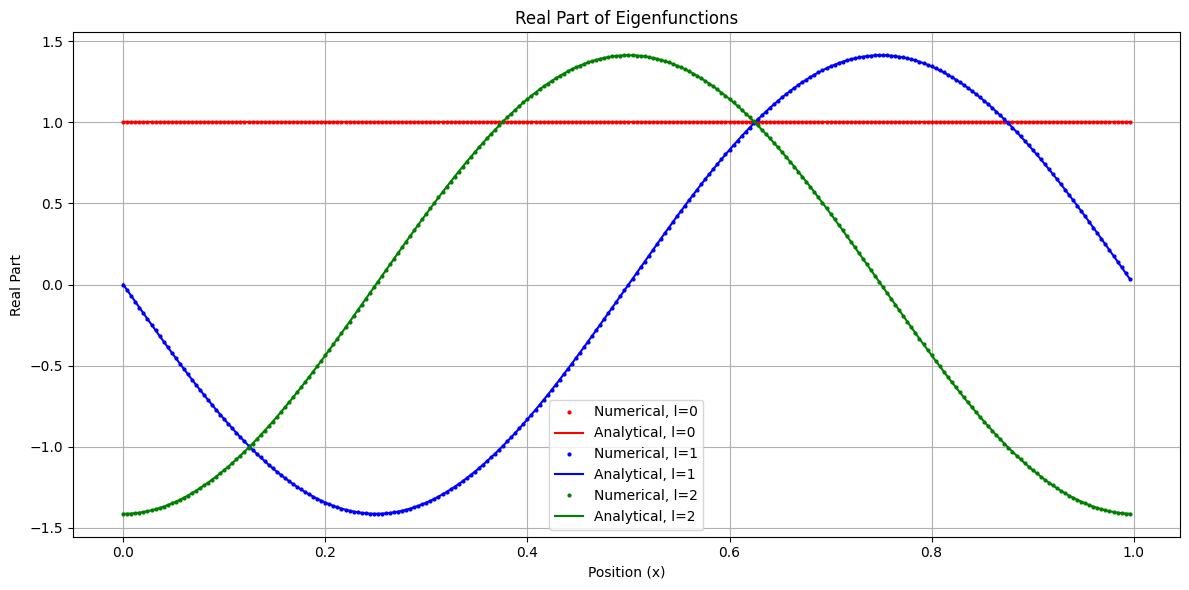

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Length of the spatial dimension
N = 250  # Number of grid points
dx = L / N  # Grid spacing
x = np.linspace(0, L-dx, N)  # Spatial grid

# Construct the discretized second derivative operator
A = np.zeros((N, N))
A = -2*np.eye(N, k=0) + np.eye(N, k=1) + np.eye(N, k=-1)

# Apply periodic boundary conditions
A[0, -1] = 1
A[-1, 0] = 1
A /= -2*dx**2  # Scale by 2*(dx)^2

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = np.linalg.eigh(A)
print('First three numerical eigenvalues')
print(eigenvalues[:3])
print('First three analytical eigenvalues')
print((2.*np.pi*0/L)**2/2, (2.*np.pi*1/L)**2/2, (2.*np.pi*1/L)**2/2)


# Analytical eigenfunctions rotated to be real
def analytical_eigenfunction(x, l):
    if l == 0:
        psi = np.ones_like(x) / np.sqrt(L)
    elif l % 2 == 0:
        ll = l // 2
        k_l = 2 * np.pi * ll / L
        psi = -(np.exp(1j * k_l * x) + np.exp(-1j * k_l * x)) / np.sqrt(2.*L)
    elif l % 2 == 1:
        ll = l // 2 + 1
        k_l = 2 * np.pi * ll / L
        psi = -(np.exp(1j * k_l * x) - np.exp(-1j * k_l * x)) / 1.j / np.sqrt(2.*L)
    return psi


# Plot the numerical and analytical eigenfunctions
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
color_list=  ['r', 'b', 'g']
for l in range(3):  # Plot first 3 eigenfunctions
    plt.plot(x, np.real(eigenfunctions[:, l])/np.sqrt(dx), 'o', markersize=2,
             color=color_list[l], label=f'Numerical, l={l}')
    # Note that for the comparison with the continous version you have to divide by
    # sqrt(dx)
    # Plot first 3 eigenfunctions
    plt.plot(x, np.real(analytical_eigenfunction(x, l)), '-',
             color=color_list[l], label=f'Analytical, l={l}')

plt.title('Real Part of Eigenfunctions')
plt.xlabel('Position (x)')
plt.ylabel('Real Part')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The mass of the particle is: 1.005


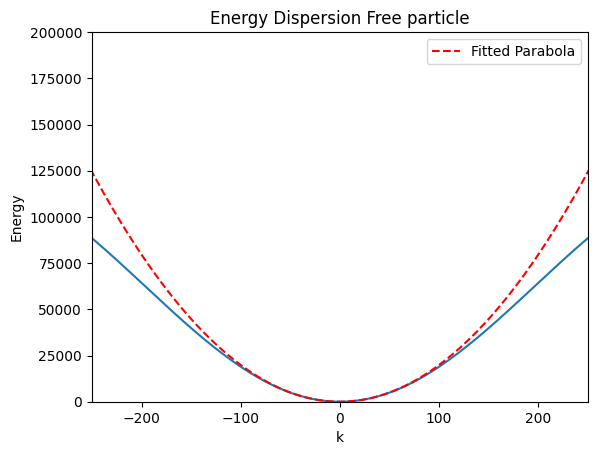

In [93]:
# Energy dispersion for the free electron and parabolic fitting:
from scipy.optimize import curve_fit

# Define the parabolic function
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

k_pos = np.pi * np.arange(0, N / 2, 1) / L
e_pos = eigenvalues[0::2]
k_neg = np.pi * np.arange(-N / 2, 0, 1) / L
e_neg = eigenvalues[1::2][::-1]

k_tot = np.append(k_neg, k_pos)
e_tot = np.append(e_neg, e_pos)

# Fit data to the parabolic function
i_min = np.argmin(e_tot)   # to select only points around minima
n_int = 10
popt, pcov = curve_fit(parabola, k_tot[i_min-n_int:i_min+n_int],
                       e_tot[i_min-n_int:i_min+n_int])

print('The mass of the particle is: %.3f' %(2/popt[0]))

plt.plot(k_tot, e_tot)
plt.plot(k_tot, parabola(k_tot, *popt), '--r', label='Fitted Parabola')
plt.title('Energy Dispersion Free particle')
plt.xlim(-250, 250)
plt.ylim(0, 2.e5)
plt.xlabel('k')
plt.ylabel('Energy')
plt.legend()


**Note:**
The dispersion you get out from the numerical calculation is a cosine band like in a tight-binding model, however within the grid representation you can arbitrarily increase you grid density and get the exact free-particle dispersion with the region of interest (which is connected to the appropriate length scales as you will see). In a tight-binding model instead the grid density is set by the lattice constant so that cannot be arbitrarily changed!